In [1]:
import numpy as np
import pandas as pd
import geopandas as gpd
import os
import pylab as pl

% pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
! curl https://www.cityhealthdashboard.com/drupal/sites/default/files/2018-10/New%20Jersey%20v3.0.zip > citydashboard.zip

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  709k  100  709k    0     0  1480k      0 --:--:-- --:--:-- --:--:-- 1483k


In [3]:
! mv citydashboard.zip $PUIDATA

In [4]:
#! unzip $PUIDATA/citydashboard.zip -d $PUIDATA


In [5]:
cdb = pd.read_csv(os.getenv("PUIDATA") + '/CHDB_data_city_NJ v3_0.csv')
cdb.head()

,state_abbr,state_fips,place_fips,stpl_fips,city_name,metric_name,metric_number,group_name,group_number,num,denom,est,lci,uci,county_indicator,educ_indicator,multiplier_indicator,data_yr_type,geo_level,date_export
0,NJ,34,10000,3410000,Camden,Absenteeism,1,total population,1,2855.0,9994.0,28.6,-999.0,-999.0,0.0,-999.0,-999.0,2015-16,city,10/26/2018
1,NJ,34,10000,3410000,Camden,Absenteeism,1,female,2,1427.0,5079.0,28.1,-999.0,-999.0,0.0,-999.0,-999.0,2015-16,city,10/26/2018
2,NJ,34,10000,3410000,Camden,Absenteeism,1,male,3,1428.0,4915.0,29.1,-999.0,-999.0,0.0,-999.0,-999.0,2015-16,city,10/26/2018
3,NJ,34,10000,3410000,Camden,Absenteeism,1,asian,4,11.0,58.0,19.0,-999.0,-999.0,0.0,-999.0,-999.0,2015-16,city,10/26/2018
4,NJ,34,10000,3410000,Camden,Absenteeism,1,black,5,1515.0,4802.0,31.5,-999.0,-999.0,0.0,-999.0,-999.0,2015-16,city,10/26/2018


In [6]:
cdb['city_name'].nunique()

9

In [7]:
cdb_2 = cdb[cdb['metric_name']=='Children in Poverty']

cdb_2.head()

,state_abbr,state_fips,place_fips,stpl_fips,city_name,metric_name,metric_number,group_name,group_number,num,denom,est,lci,uci,county_indicator,educ_indicator,multiplier_indicator,data_yr_type,geo_level,date_export
198,NJ,34,10000,3410000,Camden,Children in Poverty,4,total population,1,11953.0,23848.0,50.1,47.4,52.9,0.0,-999.0,-999.0,"2016, 5 Year Estimate",city,10/26/2018
199,NJ,34,10000,3410000,Camden,Children in Poverty,4,asian,4,187.0,555.0,33.7,16.7,50.7,0.0,-999.0,-999.0,"2016, 5 Year Estimate",city,10/26/2018
200,NJ,34,10000,3410000,Camden,Children in Poverty,4,black,5,6299.0,11723.0,53.7,49.8,57.7,0.0,-999.0,-999.0,"2016, 5 Year Estimate",city,10/26/2018
201,NJ,34,10000,3410000,Camden,Children in Poverty,4,hispanic,6,6436.0,12755.0,50.5,46.4,54.5,0.0,-999.0,-999.0,"2016, 5 Year Estimate",city,10/26/2018
202,NJ,34,10000,3410000,Camden,Children in Poverty,4,white,7,104.0,339.0,30.7,3.1,58.2,0.0,-999.0,-999.0,"2016, 5 Year Estimate",city,10/26/2018


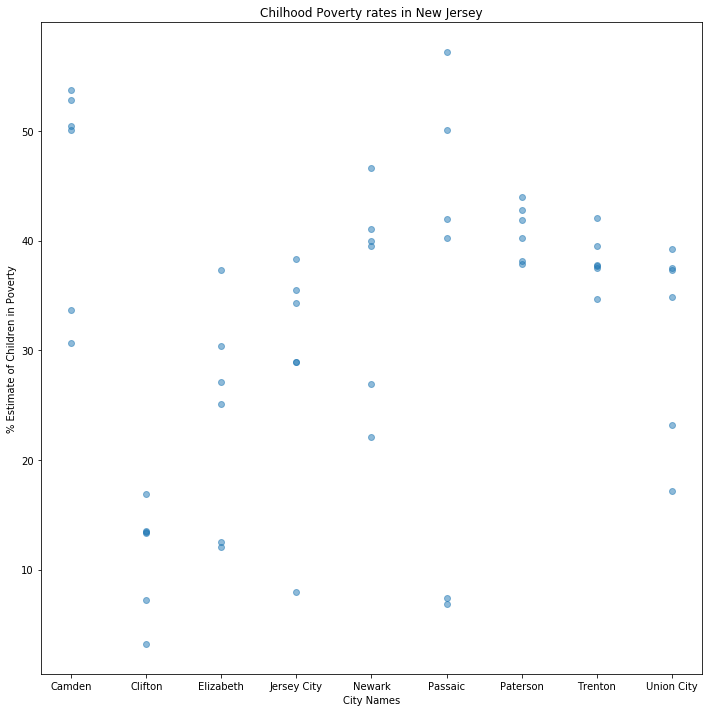

In [9]:
fig, ax = pl.subplots(figsize=(10,10))

names = cdb_2['city_name']
values = cdb_2['est']

ax.scatter(names, values, alpha=0.5)
ax.set_xlabel('City Names')
ax.set_ylabel('% Estimate of Children in Poverty')
ax.set_title('Chilhood Poverty rates in New Jersey')

pl.tight_layout()